In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Internship-ICT\credit.csv')

## data exploration

In [3]:
df.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [4]:
#Print the number of rows and columns of the dataset
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
#statistical analysis
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [7]:
## Checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [9]:
## count number of missing values
print(df.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [8]:
## Removing unnecessory columns in our data

data = df.copy()
data.drop(["ID","Name","SSN"], axis=1, inplace=True)

In [9]:
data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

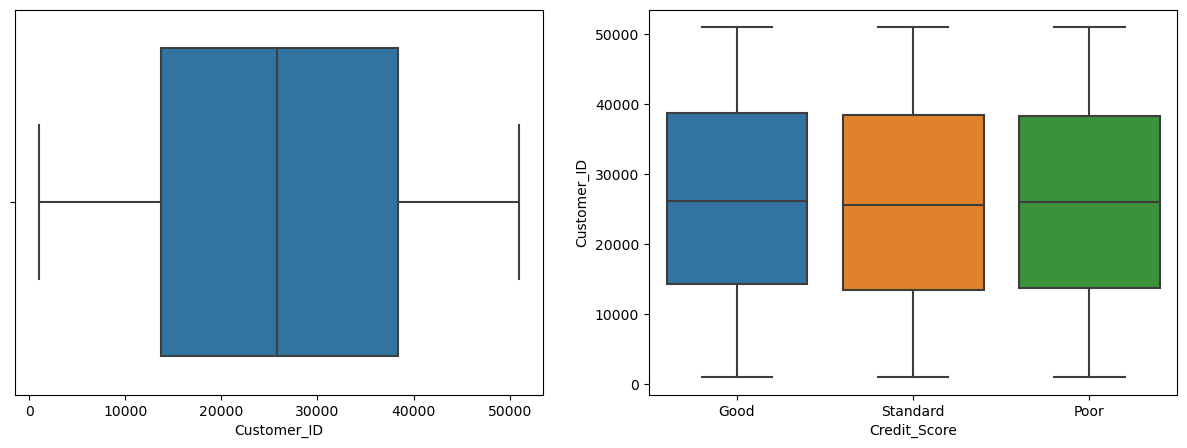

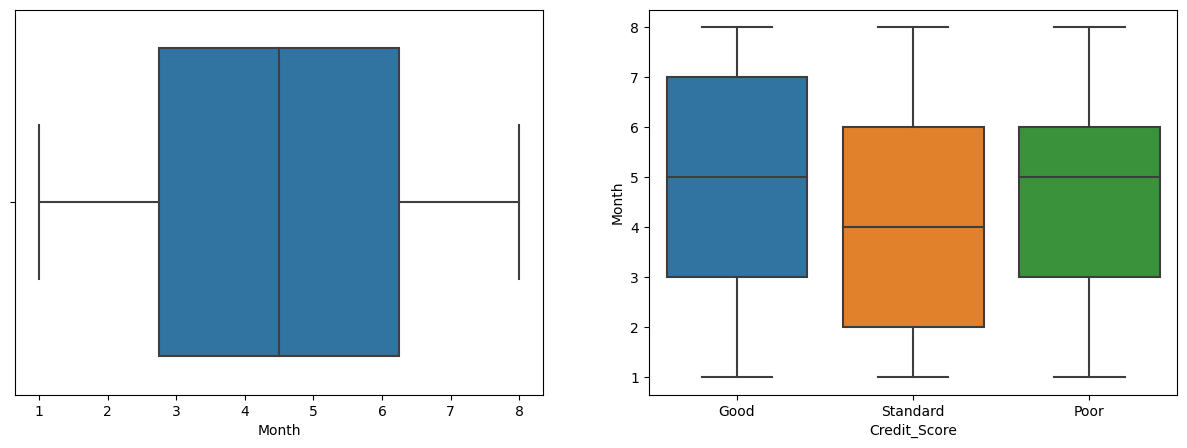

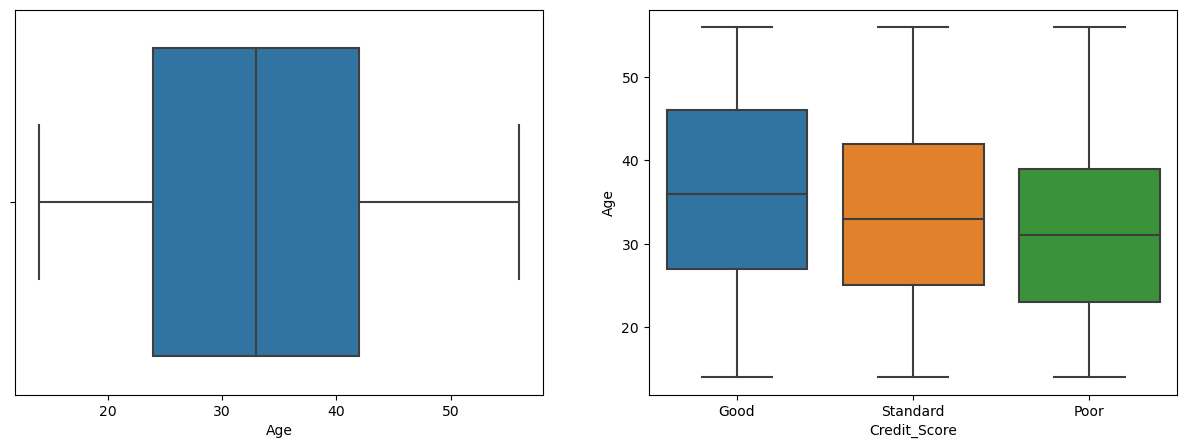

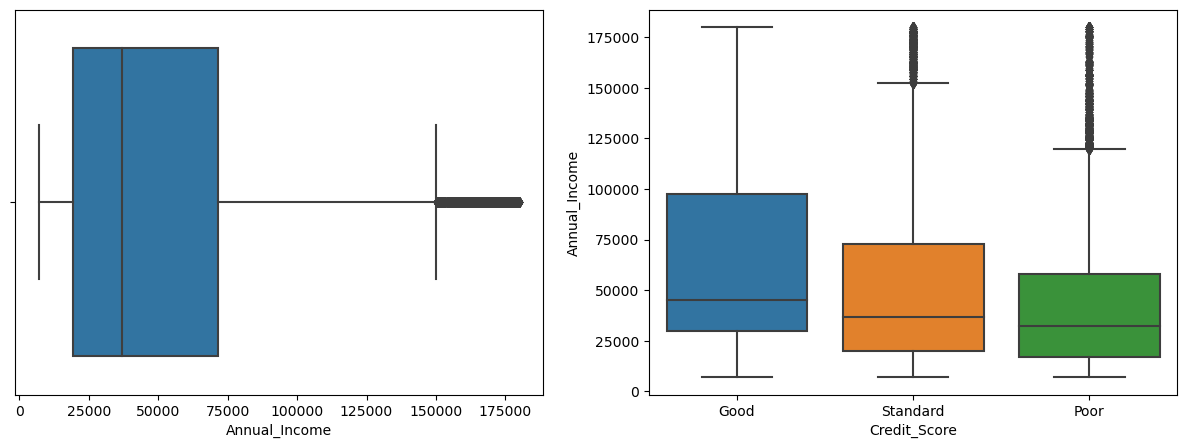

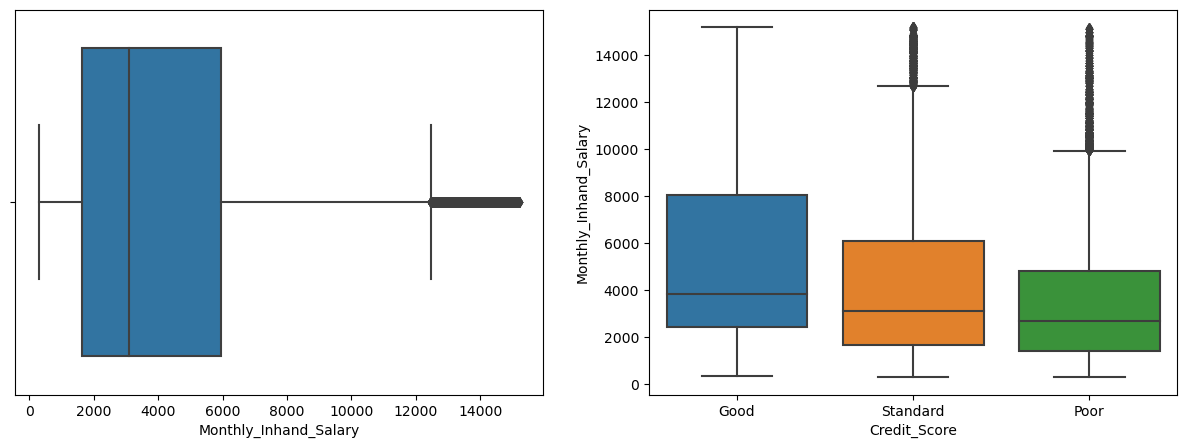

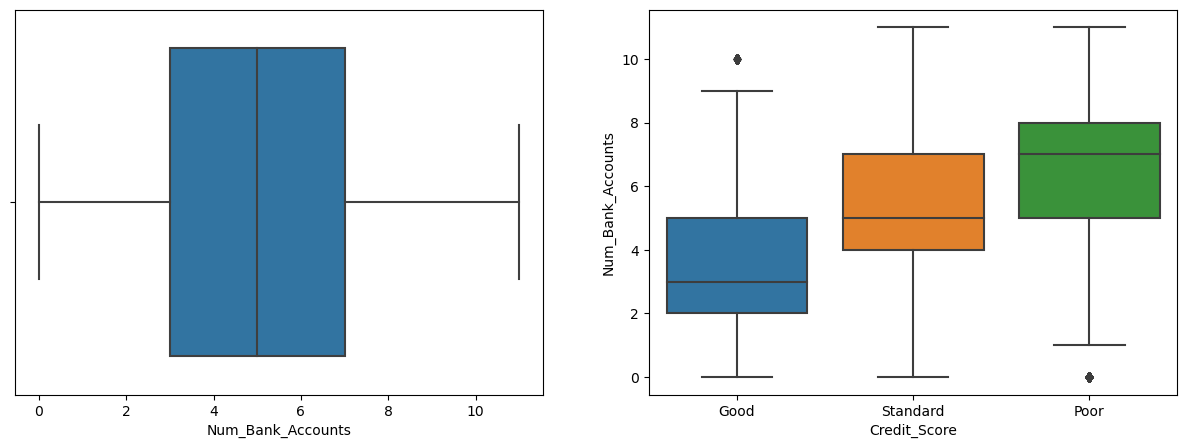

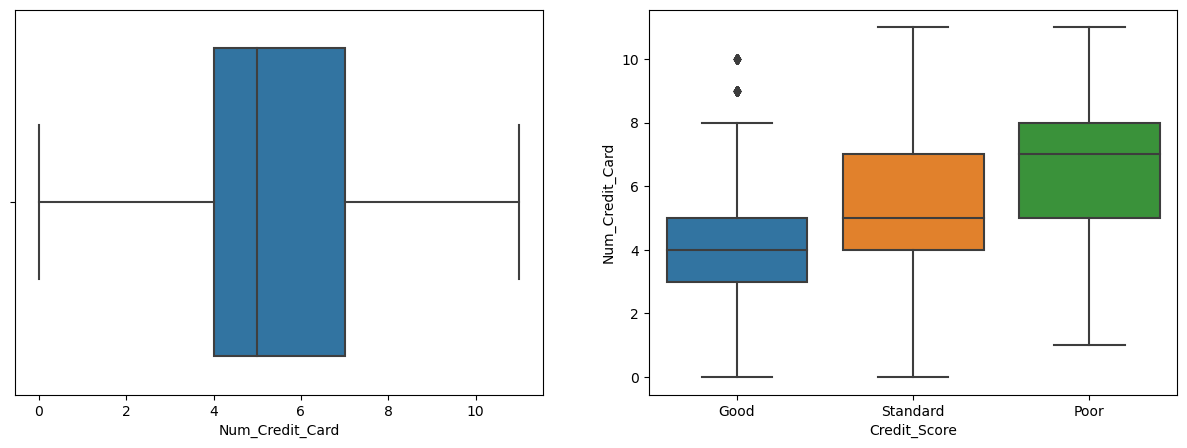

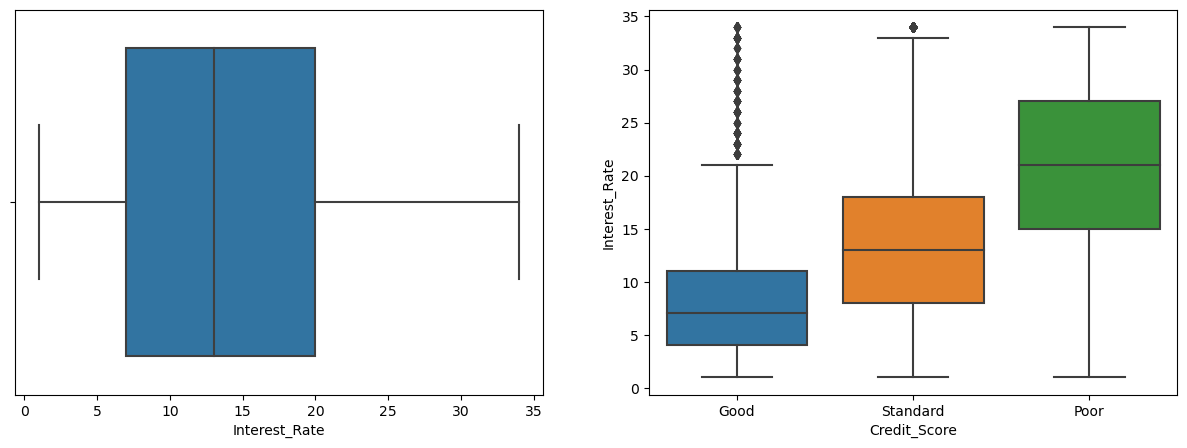

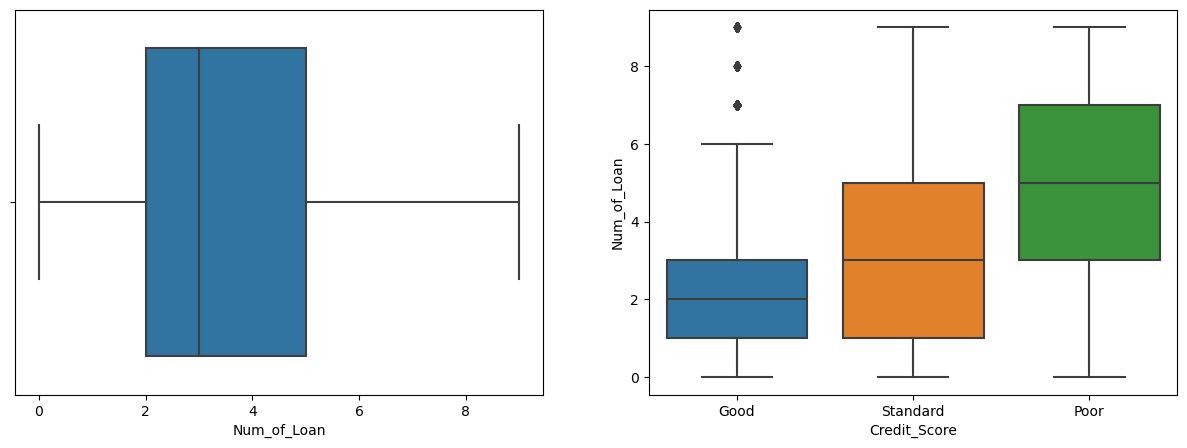

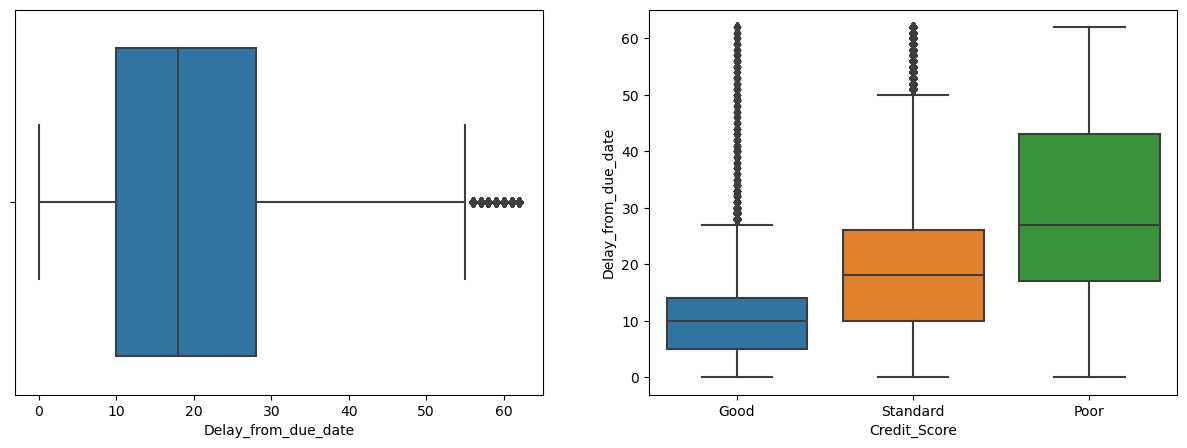

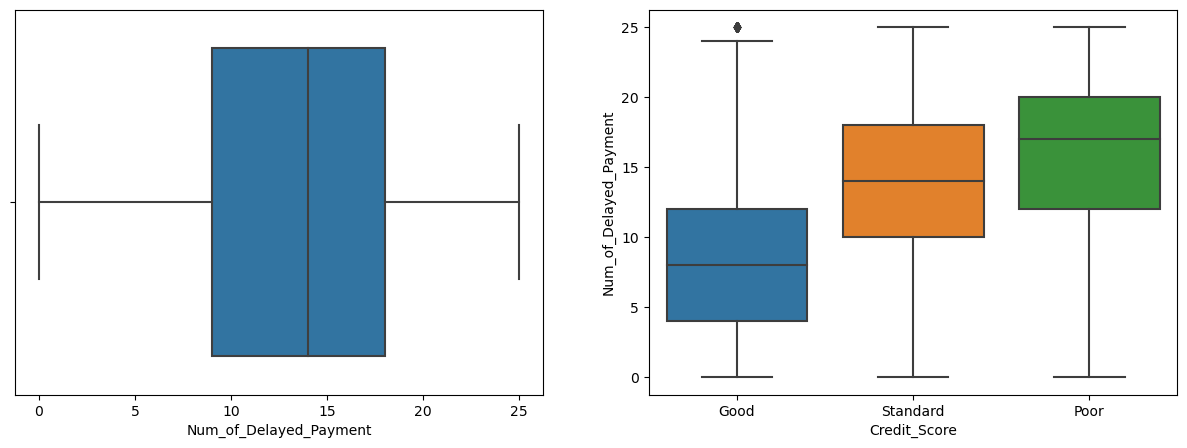

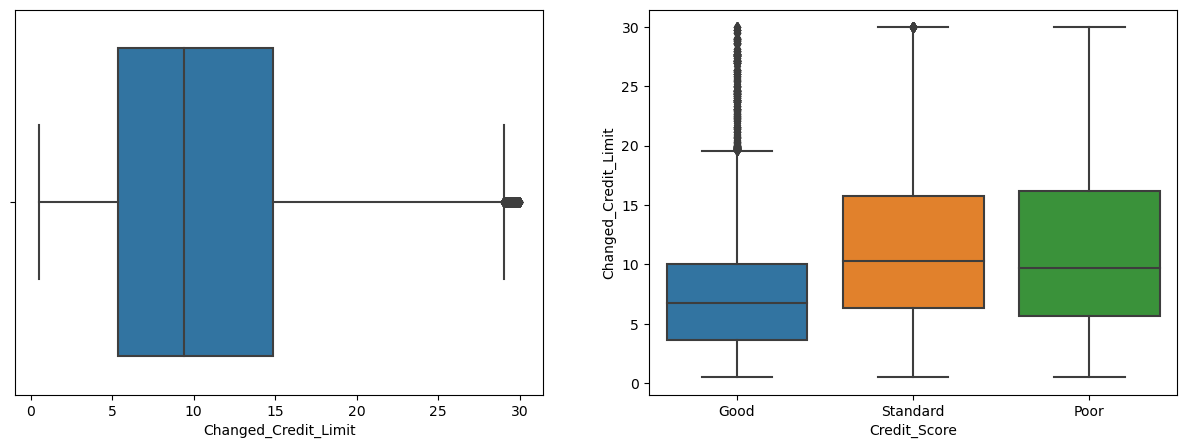

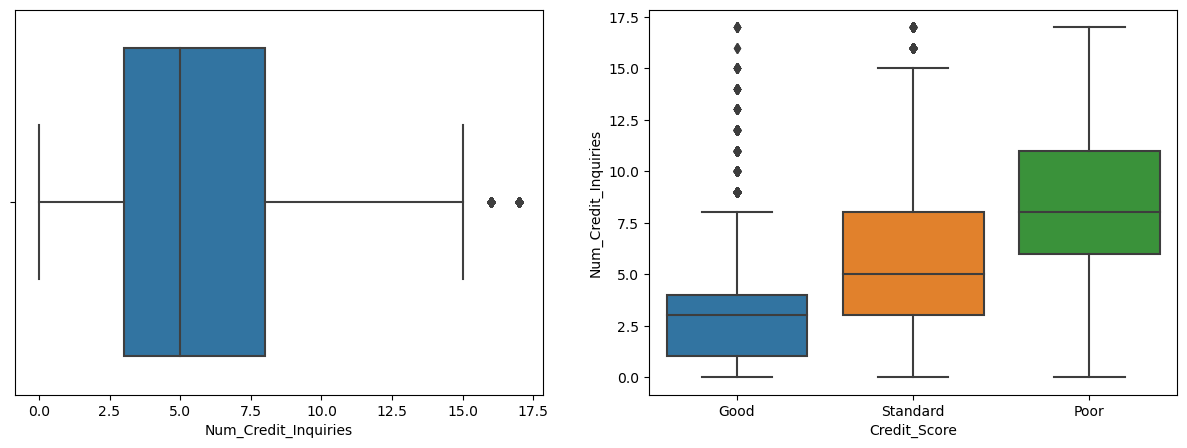

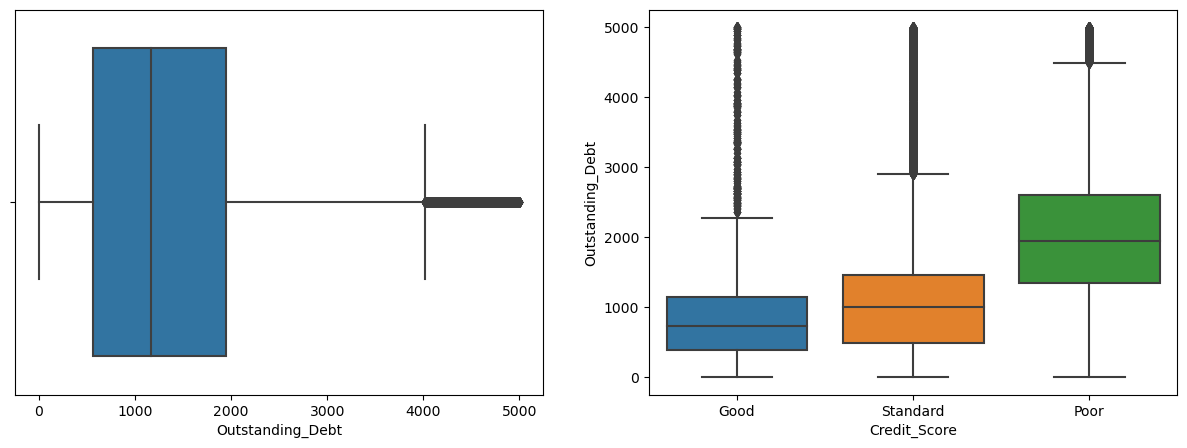

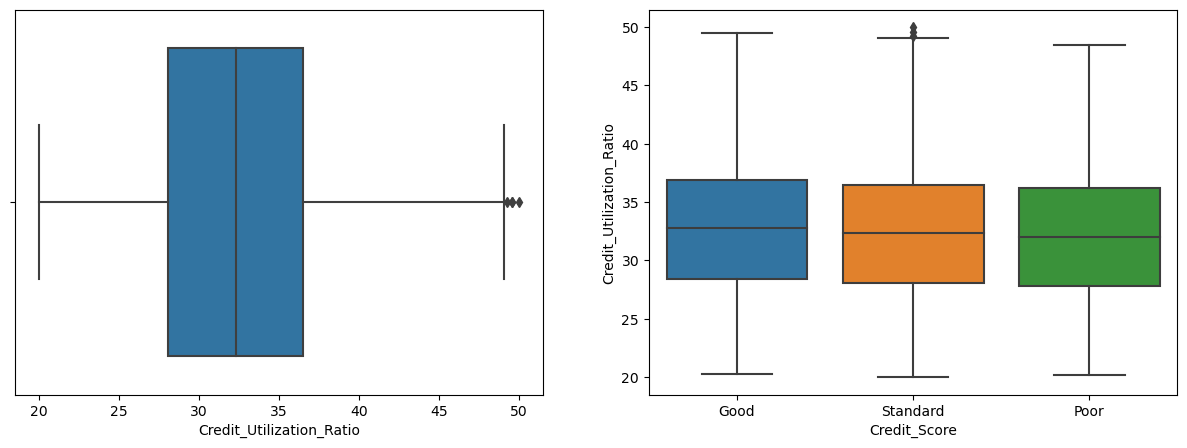

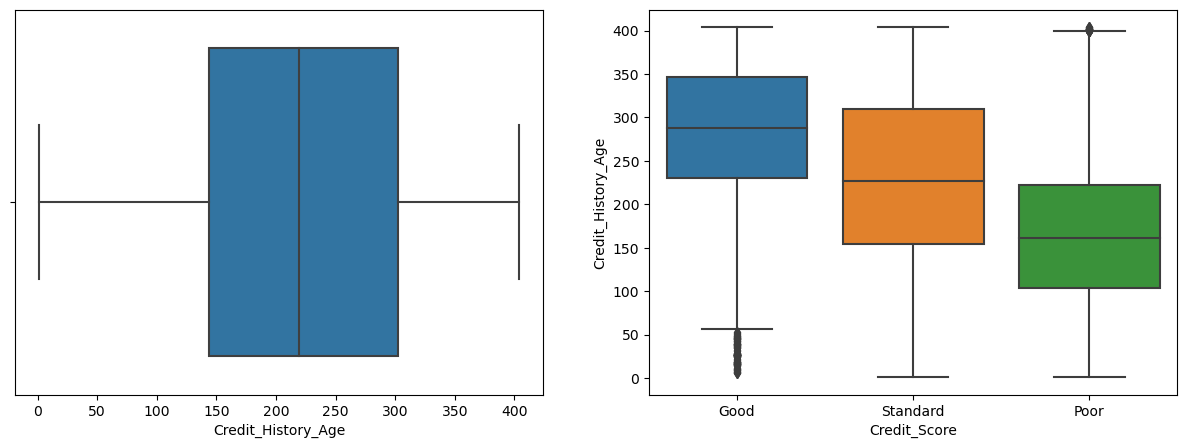

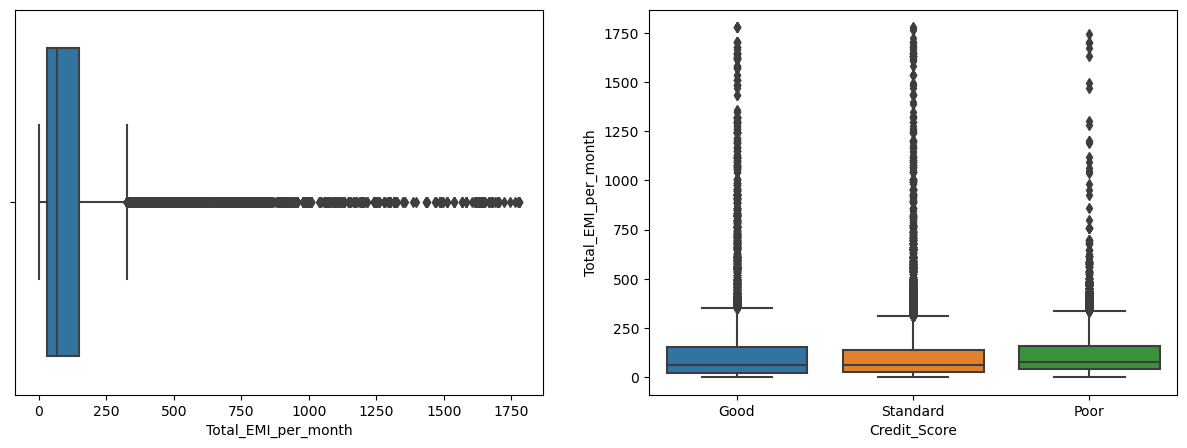

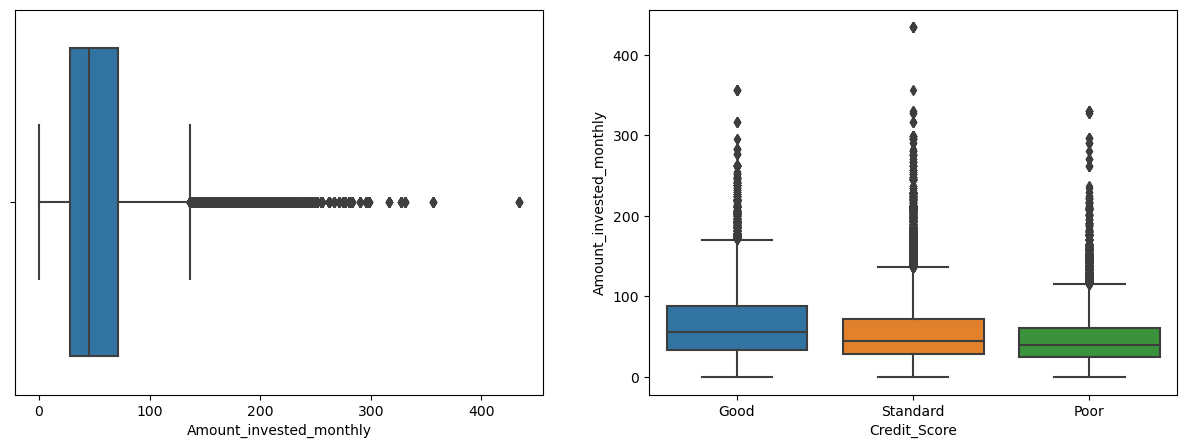

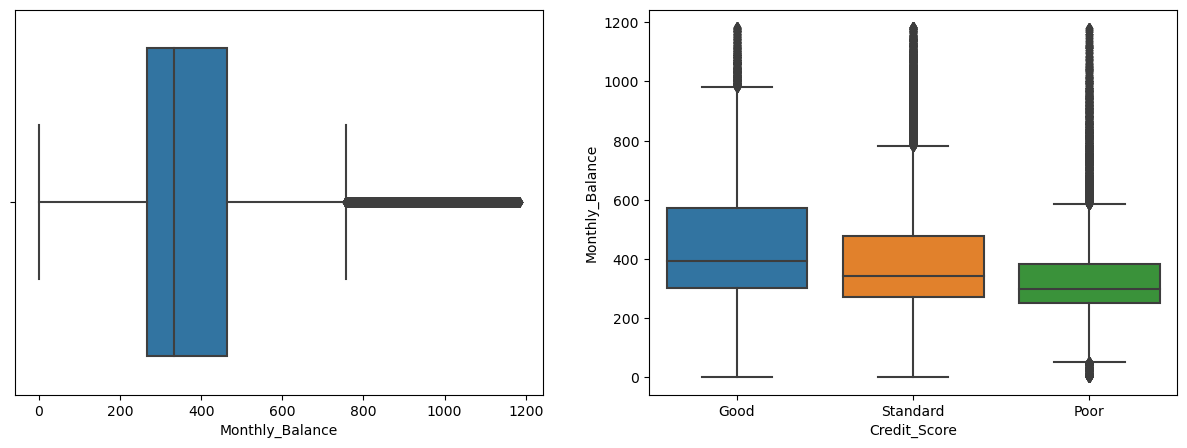

In [10]:
for col in data.select_dtypes(include = np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data =data)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score',y=col, data =data)
    plt.show()

In [11]:
num_cols=data.select_dtypes(include=["int64","float64"]).columns[1:-8].tolist()
num_cols

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment']

In [12]:
# By using IQR method

def ouitlier_thresholds(data, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=data[col_name].quantile(low_quantile)
    Q3=data[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit

#  fill the outliers with the median value of the relevant variable

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = ouitlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
    dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()

In [13]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [14]:
#Transforming the column in 0, 1, or 2.
data['Credit_Mix'] = data['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [15]:
# After transformation
data['Credit_Mix'].unique()

array([2, 1, 0], dtype=int64)

In [16]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [17]:
#Transforming the column in 0, 1, or 2.
data['Credit_Score'] = data['Credit_Score'].map({'Good': 2, 'Standard': 1, 'Poor': 0})

In [18]:
# After transformation
data['Credit_Score'].unique()

array([2, 1, 0], dtype=int64)

In [19]:
X = data[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]].values
y = data['Credit_Score'].values

In [20]:
print(X.shape, y.shape)

(100000, 12) (100000,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 12) (20000, 12) (80000,) (20000,)


In [22]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN Classifier

In [23]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [24]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.79
Confusion Matrix:
[[4790 1041   43]
 [1328 8426  845]
 [  85  927 2515]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5874
           1       0.81      0.79      0.80     10599
           2       0.74      0.71      0.73      3527

    accuracy                           0.79     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.79      0.79      0.79     20000



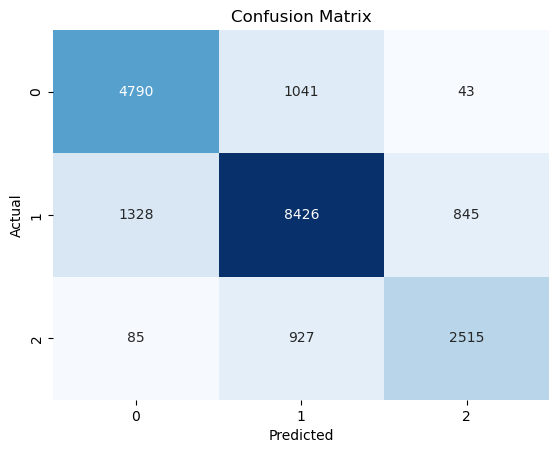

In [25]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision tree classifier

In [26]:
# Create decision tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train the model using the training sets
dt_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
dt_predictions = dt_classifier.predict(X_test_scaled)

In [27]:
# evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
conf_matrix = confusion_matrix(y_test, dt_predictions)
classification_rep = classification_report(y_test, dt_predictions)

print(f'Accuracy: {dt_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.66
Confusion Matrix:
[[4755  501  618]
 [2946 5756 1897]
 [ 253  496 2778]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.81      0.69      5874
           1       0.85      0.54      0.66     10599
           2       0.52      0.79      0.63      3527

    accuracy                           0.66     20000
   macro avg       0.66      0.71      0.66     20000
weighted avg       0.72      0.66      0.66     20000



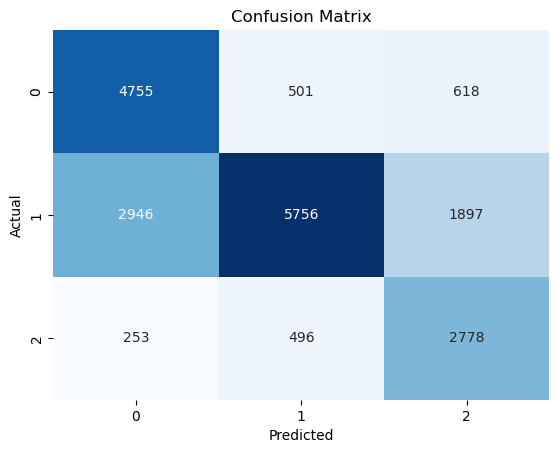

In [28]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random forest classifier

In [29]:
# Create Random forest Classifier
rf_classifier = RandomForestClassifier()

# train the model using the training sets
rf_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test_scaled)

In [30]:
# evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print(f'Accuracy: {rf_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.81
Confusion Matrix:
[[4915  943   16]
 [1201 8634  764]
 [  12  805 2710]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5874
           1       0.83      0.81      0.82     10599
           2       0.78      0.77      0.77      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000



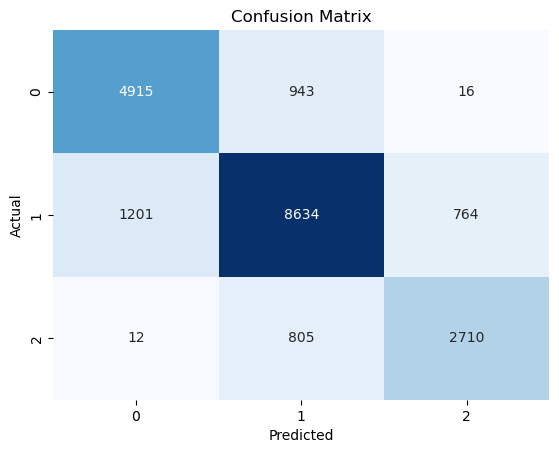

In [31]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(f'KNN_Accuracy: {knn_accuracy:.2f}')
print(f'Decision tree_Accuracy: {dt_accuracy:.2f}')
print(f'Random forest_Accuracy: {rf_accuracy:.2f}')

KNN_Accuracy: 0.79
Decision tree_Accuracy: 0.66
Random forest_Accuracy: 0.81


## Cross Validation

### K-fold cross validation

In [33]:
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [10000 10001 10002 ... 99997 99998 99999]
Testing Index: [   0    1    2 ... 9997 9998 9999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [10000 10001 10002 ... 19997 19998 19999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [20000 20001 20002 ... 29997 29998 29999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [30000 30001 30002 ... 39997 39998 39999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [40000 40001 40002 ... 49997 49998 49999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [50000 50001 50002 ... 59997 59998 59999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [60000 60001 60002 ... 69997 69998 69999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [70000 70001 70002 ... 79997 79998 79999]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [80000 80001 

In [34]:
## KNN
knn_cv = cross_val_score(knn_classifier,X,y,cv = kfold_validator)

In [35]:
knn_cv

array([0.4921, 0.5202, 0.4876, 0.5067, 0.5135, 0.5009, 0.5071, 0.5107,
       0.4889, 0.51  ])

In [36]:
knn_cv_mean = np.mean(knn_cv)
knn_cv_mean

0.50377

In [37]:
##decision tree
dt_cv = cross_val_score(dt_classifier,X,y,cv = kfold_validator)

In [38]:
dt_cv

array([0.6683, 0.6694, 0.6615, 0.6713, 0.6617, 0.6774, 0.6678, 0.6508,
       0.6682, 0.6899])

In [39]:
dt_cv_mean = np.mean(dt_cv)
dt_cv_mean

0.66863

In [40]:
## random forest
rf_cv = cross_val_score(rf_classifier,X,y,cv = kfold_validator)

In [41]:
rf_cv

array([0.68  , 0.6805, 0.683 , 0.6814, 0.6803, 0.6882, 0.6839, 0.681 ,
       0.6878, 0.699 ])

In [42]:
rf_cv_mean = np.mean(rf_cv)
rf_cv_mean

0.68451

In [43]:
print(f'KNN_Average_Accuracy: {knn_cv_mean}')
print(f'decisionTree_Average_Accuracy: {dt_cv_mean}')
print(f'RandomForest_Average_Accuracy: {rf_cv_mean}')

KNN_Average_Accuracy: 0.50377
decisionTree_Average_Accuracy: 0.66863
RandomForest_Average_Accuracy: 0.68451


## Stratified K-fold Cross validation

In [44]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [45]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 9635  9636  9639 ... 99997 99998 99999]
Testing Index: [    0     1     2 ... 10232 10233 10234]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [ 9635  9636  9639 ... 20045 20046 20047]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [19926 19927 19944 ... 30067 30068 30069]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [29862 29863 29918 ... 40326 40327 40328]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [39482 39483 39484 ... 50318 50320 50321]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [49484 49485 49486 ... 60187 60188 60189]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [59586 59587 59588 ... 70299 70300 70301]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [69533 69534 69535 ... 80770 80773 80774]
Training Index: [    0     1     2 ... 99997 99998 99999]
Testing Index: [79087 

In [46]:
## KNN

knn_sk = cross_val_score(knn_classifier,X,y,cv = skfold_validator)

In [47]:
knn_sk

array([0.4906, 0.5175, 0.4862, 0.5003, 0.5052, 0.4992, 0.4993, 0.4946,
       0.4831, 0.5097])

In [48]:
knn_sk_mean = np.mean(knn_sk)
knn_sk_mean

0.49856999999999996

In [49]:
## Decision tree

dt_sk = cross_val_score(dt_classifier,X,y,cv = skfold_validator)

In [50]:
dt_sk

array([0.6639, 0.672 , 0.6604, 0.6647, 0.6741, 0.6706, 0.6709, 0.6564,
       0.6698, 0.6786])

In [51]:
dt_sk_mean = np.mean(dt_sk)
dt_sk_mean

0.6681400000000001

In [52]:
## Random forest

rf_sk = cross_val_score(rf_classifier,X,y,cv = skfold_validator)

In [53]:
rf_sk

array([0.6733, 0.6676, 0.6793, 0.6775, 0.6698, 0.6671, 0.6688, 0.6602,
       0.6731, 0.6884])

In [54]:
rf_sk_mean = np.mean(rf_sk)
rf_sk_mean

0.6725099999999999

In [55]:
print(f'KNN_Average_Accuracy: {knn_sk_mean}')
print(f'DecisionTree_Average_Accuracy: {dt_sk_mean}')
print(f'RandomForest_Average_Accuracy: {rf_sk_mean}')

KNN_Average_Accuracy: 0.49856999999999996
DecisionTree_Average_Accuracy: 0.6681400000000001
RandomForest_Average_Accuracy: 0.6725099999999999


## Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(dt_classifier, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_classifier = grid_obj.best_estimator_

# Train the model using the training sets 
dt_classifier.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\U

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_split=3)

In [57]:
# Prediction on test set
y_pred = dt_classifier.predict(X_test)

In [58]:
from sklearn import metrics
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  76.32


In [59]:
# K - Nearest Neighbors

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn_classifier, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn_classifier = grid_obj.best_estimator_

# Train the model using the training sets 
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=4, weights='distance')

In [60]:
# Prediction on test data
y_pred = knn_classifier.predict(X_test)

In [61]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  77.09


In [ ]:
# Random Forest Classifier

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf_classifier, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf_classifier = grid_obj.best_estimator_

# Train the model using the training sets 
rf_classifier.fit(X_train,y_train)

In [ ]:
# Prediction on test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 
              'K - Nearest Neighbors'],
    'Score': [acc_dt, acc_rf, acc_knn]})
models.sort_values(by='Score', ascending=False)